<a href="https://colab.research.google.com/github/O-Kpy/Kaggle/blob/main/Pima%EB%B9%A0%EB%A5%B4%EA%B2%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv('/content/drive/MyDrive/dataset/kaggle/Pima Indians.csv')

In [ ]:
data.shape

(768, 9)

In [4]:
data.loc[:,'Glucose':'Age'] = data.loc[:,'Glucose':'Age'].replace(0,np.NaN)

In [5]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


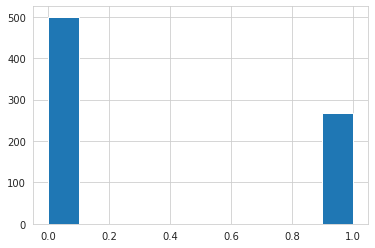

In [7]:
data.Outcome.hist()

In [9]:
from sklearn.utils import resample

In [10]:
no = data[data.Outcome == 0]
yes = data[data.Outcome == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=100)
data = pd.concat([no, yes_oversampled], axis=0)

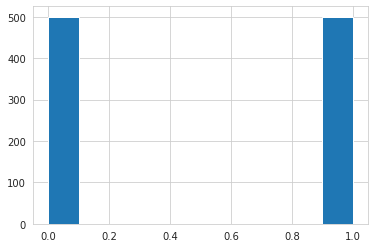

In [11]:
data.Outcome.hist()
## 오버샘플링

In [12]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [13]:
miceimputed = data.copy(deep=True)
imputed = IterativeImputer()
miceimputed.iloc[:,:] = imputed.fit_transform(data)
## 결측치 해결

In [14]:
data = miceimputed
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                   5.000000
Glucose                      45.000000
BloodPressure                14.000000
SkinThickness                12.173717
Insulin                     102.422825
BMI                           8.850000
DiabetesPedigreeFunction      0.412250
Age                          16.250000
Outcome                       1.000000
dtype: float64


In [17]:
data = data[~((data < (Q1-1.5*IQR)) | (data > (Q3 + 1.5*IQR))).any(axis=1)]
## 이상치 제거

In [18]:
x = data.drop(['Outcome'], axis=1)
y = data['Outcome']

In [22]:
from sklearn.preprocessing import robust_scale
scaler = robust_scale(x)
x = pd.DataFrame(scaler, columns=x.columns)

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=123)
print(f'x_train:{x_train.shape}, y_train:{y_train.shape}, x_test:{x_test.shape}, y_test{y_test.shape}')

x_train:(655, 8), y_train:(655,), x_test:(219, 8), y_test(219,)


In [27]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_auc_score, cohen_kappa_score, classification_report, plot_confusion_matrix

In [48]:
def model(model):
  model = model
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  print('accuracy:', accuracy_score(y_test, y_pred))
  print('roc_auc_score::', roc_auc_score(y_test, y_pred))
  print('cohen_kappa_score:', cohen_kappa_score(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  plot_confusion_matrix(model, x_test, y_test, normalize='all', cmap=plt.cm.Blues)

accuracy: 0.726027397260274
roc_auc_score:: 0.7257714762301919
cohen_kappa_score: 0.45176902536715624
              precision    recall  f1-score   support

         0.0       0.70      0.78      0.74       110
         1.0       0.75      0.67      0.71       109

    accuracy                           0.73       219
   macro avg       0.73      0.73      0.73       219
weighted avg       0.73      0.73      0.73       219



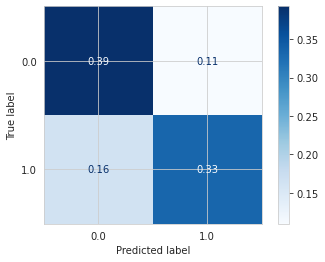

In [49]:
model(LogisticRegression(n_jobs=-1, random_state=123, C=0.5))

accuracy: 0.867579908675799
roc_auc_score:: 0.8678065054211843
cohen_kappa_score: 0.7352757283981493
              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86       110
         1.0       0.83      0.92      0.87       109

    accuracy                           0.87       219
   macro avg       0.87      0.87      0.87       219
weighted avg       0.87      0.87      0.87       219



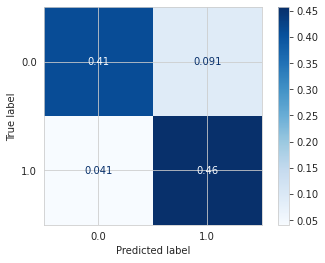

In [35]:
model(RandomForestClassifier(max_depth=10, n_jobs=-1))

accuracy: 0.8447488584474886
roc_auc_score:: 0.8449958298582152
cohen_kappa_score: 0.6896465488496166
              precision    recall  f1-score   support

         0.0       0.89      0.79      0.84       110
         1.0       0.81      0.90      0.85       109

    accuracy                           0.84       219
   macro avg       0.85      0.84      0.84       219
weighted avg       0.85      0.84      0.84       219



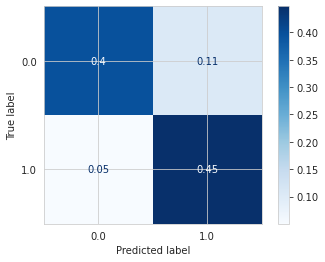

In [40]:
model(xgb.XGBClassifier(max_depth=8, n_jobs=-1))

accuracy: 0.8264840182648402
roc_auc_score:: 0.8267723102585489
cohen_kappa_score: 0.6531632908227056
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82       110
         1.0       0.79      0.89      0.84       109

    accuracy                           0.83       219
   macro avg       0.83      0.83      0.83       219
weighted avg       0.83      0.83      0.83       219



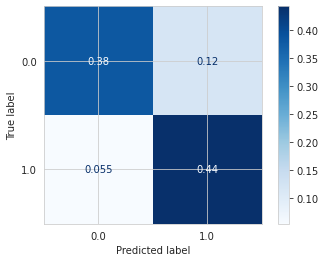

In [50]:
model(DecisionTreeClassifier(max_depth=10, random_state=123))

In [52]:
from sklearn.model_selection import GridSearchCV

In [54]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

model_xgb = xgb.XGBClassifier()
model_xgb.fit(x_train, y_train)

model_dec = DecisionTreeClassifier()
model_dec.fit(x_train, y_train)

model_log = LogisticRegression()
model_log.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
param_rf = {'max_depth':np.arange(1, 100, 10),
            'n_estimators':np.arange(100,200,10)}

grid_rf = GridSearchCV(model_rf, param_rf, n_jobs=-1, cv=5)
grid_rf.fit(x_train, y_train)

print(f'튜닝한 RandomForest best score:{grid_rf.best_score_}, best parameters:{grid_rf.best_params_}')

튜닝한 RandomForest best score:0.8641221374045802, best parameters:{'max_depth': 51, 'n_estimators': 190}


accuracy: 0.867579908675799
roc_auc_score:: 0.8678065054211843
cohen_kappa_score: 0.7352757283981493
              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86       110
         1.0       0.83      0.92      0.87       109

    accuracy                           0.87       219
   macro avg       0.87      0.87      0.87       219
weighted avg       0.87      0.87      0.87       219



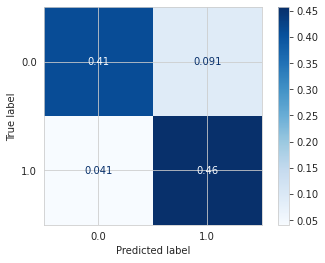

In [77]:
model(RandomForestClassifier(max_depth=10))

In [66]:
param_xgb = {'max_depth':np.arange(5, 100, 10),
            'n_estimators':np.arange(100,200,10)}

grid_xgb = GridSearchCV(model_xgb, param_xgb, n_jobs=-1, cv=5)
grid_xgb.fit(x_train, y_train)

print(f'튜닝한 XGBoost best score:{grid_xgb.best_score_}, best parameters:{grid_xgb.best_params_}')

튜닝한 XGBoost best score:0.8396946564885497, best parameters:{'max_depth': 5, 'n_estimators': 180}


In [65]:
param_log = {'penalty':['l1', 'l2'],
            'C':np.arange(0.1,1,0.1)}

grid_log = GridSearchCV(model_log, param_log, n_jobs=-1, cv=5)
grid_log.fit(x_train, y_train)

print(f'튜닝한 LogisticRegression best score:{grid_log.best_score_}, best parameters:{grid_log.best_params_}')

튜닝한 LogisticRegression best score:0.751145038167939, best parameters:{'C': 0.8, 'penalty': 'l2'}


In [67]:
param_dec = {'max_depth':np.arange(5, 100, 10)}

grid_dec = GridSearchCV(model_dec, param_dec, n_jobs=-1, cv=5)
grid_dec.fit(x_train, y_train)

print(f'튜닝한 DecisionTrue best score:{grid_dec.best_score_}, best parameters:{grid_dec.best_params_}')

튜닝한 DecisionTrue best score:0.815267175572519, best parameters:{'max_depth': 55}


accuracy: 0.8264840182648402
roc_auc_score:: 0.8268140116763969
cohen_kappa_score: 0.6531921986997833
              precision    recall  f1-score   support

         0.0       0.88      0.75      0.81       110
         1.0       0.78      0.90      0.84       109

    accuracy                           0.83       219
   macro avg       0.83      0.83      0.83       219
weighted avg       0.83      0.83      0.83       219



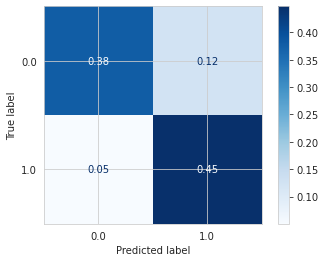

In [68]:
model(DecisionTreeClassifier(max_depth=55))

In [111]:
feature_importance = pd.DataFrame([model_dec.feature_importances_, model_rf.feature_importances_, model_xgb.feature_importances_], index=['DecisionTree', 'RandomForest', 'XGBoost'], columns=x.columns).T
feature_importance = feature_importance.rename(index={'DiabetesPedigreeFunction':'DPF'})

Text(0.5, 1.0, 'XGBoost Feature_importaces')

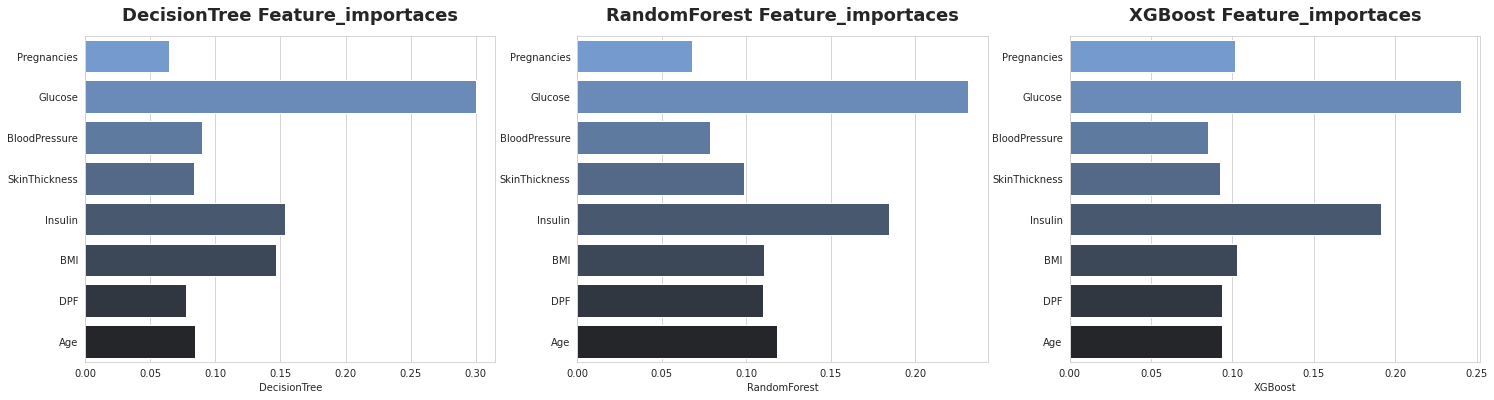

In [118]:
fig, ax = plt.subplots(1,3, figsize=(25,6))
ax[0] = sns.barplot(x=feature_importance['DecisionTree'], y=feature_importance.index, palette=sns.dark_palette("#69d", reverse=True, n_colors=len(feature_importance.index)),ax=ax[0])
ax[0].set_title('DecisionTree Feature_importaces', fontsize=18, fontweight='bold', pad=15)
ax[1] = sns.barplot(x=feature_importance['RandomForest'], y=feature_importance.index, palette=sns.dark_palette("#69d", reverse=True, n_colors=len(feature_importance.index)),ax=ax[1])
ax[1].set_title('RandomForest Feature_importaces', fontsize=18, fontweight='bold', pad=15)
ax[2] = sns.barplot(x=feature_importance['XGBoost'], y=feature_importance.index, palette=sns.dark_palette("#69d", reverse=True, n_colors=len(feature_importance.index)),ax=ax[2])
ax[2].set_title('XGBoost Feature_importaces', fontsize=18, fontweight='bold', pad=15)

data_copy = data.copy()
## data는 이상치 제거 하고, data_copy는 바로 모델링 해본다.

In [ ]:
data_copy = data.copy()

In [ ]:
X = data_copy.drop(['Outcome'], axis=1)
Y = data_copy['Outcome']

In [ ]:
scaler = robust_scale(X)
X = scaler

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.25, random_state=100)
print(f'{X_train.shape, Y_train.shape, X_test.shape, Y_test.shape}')

((750, 8), (750,), (250, 8), (250,))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, cohen_kappa_score, classification_report

In [ ]:
model_rf = RandomForestClassifier(n_estimators=200, max_depth=100, n_jobs=-1)
model_rf.fit(X_train, Y_train)
Y_pred_rf = model_rf.predict(X_test)
print(f'accuracy : {accuracy_score(Y_test, Y_pred_rf)}')
print(f'f1_score : {f1_score(Y_test, Y_pred_rf)}')
print(f'roc_auc_score : {roc_auc_score(Y_test, Y_pred_rf)}')
print(f'cohen_kappa_score : {cohen_kappa_score(Y_test, Y_pred_rf)}')

accuracy : 0.828
f1_score : 0.8185654008438819
roc_auc_score : 0.8298503611971104
cohen_kappa_score : 0.6555149650708197


In [ ]:
model_xgb = xgb.XGBClassifier(max_depth=100, n_estimators=200, n_jobs=-1)
model_xgb.fit(X_train, Y_train)
Y_pred_xgb = model_xgb.predict(X_test)
print(f'accuracy : {accuracy_score(Y_test, Y_pred_xgb)}')
print(f'f1_score : {f1_score(Y_test, Y_pred_xgb)}')
print(f'roc_auc_score : {roc_auc_score(Y_test, Y_pred_xgb)}')
print(f'cohen_kappa_score : {cohen_kappa_score(Y_test, Y_pred_xgb)}')

accuracy : 0.804
f1_score : 0.7966804979253113
roc_auc_score : 0.8070820433436533
cohen_kappa_score : 0.6085511599667668


In [ ]:
from sklearn.model_selection import GridSearchCV, 

In [ ]:
param_rf = {'max_depth':np.arange(100, 200, 10), 'n_estimators':np.arange(50, 200, 10)}
grid_rf = GridSearchCV(model_rf, param_rf, cv=5, n_jobs=-1)
grid_rf.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=100,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=-1,
                                              oob_score=False,
                                              random_s

In [ ]:
print(f'RainForest의 best socre : {grid_rf.best_score_}, best parameter : {grid_rf.best_params_}')

RainForest의 best socre : 0.8720000000000001, best parameter : {'max_depth': 130, 'n_estimators': 80}


In [ ]:
model_rf = RandomForestClassifier(max_depth=130, n_estimators=80)
model_rf.fit(X_train, Y_train)
Y_pred_rf = model_rf.predict(X_test)
print(f'accuracy : {accuracy_score(Y_test, Y_pred_rf)}')
print(f'f1_score : {f1_score(Y_test, Y_pred_rf)}')
print(f'roc_auc_score : {roc_auc_score(Y_test, Y_pred_rf)}')
print(f'cohen_kappa_score : {cohen_kappa_score(Y_test, Y_pred_rf)}')
## 더 안좋은데...

accuracy : 0.808
f1_score : 0.7948717948717949
roc_auc_score : 0.8086300309597524
cohen_kappa_score : 0.6146435452793835




---

# **결론(conclusion)**
---



1.   Iterative Imputer를 돌려서 결측치 처리하는게 나아보임
2.   이상값 처리하면 성능향상 (4~5% 향상)


